 # Unveiling the Android App Market: Analyzing Google Play Store Data
**Project 4 Proposal
Level-2



In [1]:
import pandas as pd

# Loading datasets
apps_df = pd.read_csv("apps.csv")
reviews_df = pd.read_csv("user_reviews.csv")

# Displaying basic info for both
print("Apps Dataset:")
print(apps_df.info())
print("\nReviews Dataset:")
print(reviews_df.info())


Apps Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None

Reviews Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 642

In [2]:
# Drop unnamed index column if it exists
apps_df = apps_df.drop(columns=["Unnamed: 0"], errors='ignore')

# Drop rows with missing values in key columns
apps_df = apps_df.dropna(subset=["Rating", "Size", "Current Ver", "Android Ver"])

# Clean 'Installs' column: remove '+' and ',' then convert to int
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Clean 'Price' column: remove '$' and convert to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False).astype(float)

# Reset index after drops
apps_df.reset_index(drop=True, inplace=True)

# Preview cleaned dataset
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Drop rows where all values are NaN
reviews_df.dropna(how='all', inplace=True)

# Drop rows with missing review text
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

# Convert sentiment polarity & subjectivity to numeric (in case they're not)
reviews_df['Sentiment_Polarity'] = pd.to_numeric(reviews_df['Sentiment_Polarity'], errors='coerce')
reviews_df['Sentiment_Subjectivity'] = pd.to_numeric(reviews_df['Sentiment_Subjectivity'], errors='coerce')

# Drop rows with NaNs in polarity or subjectivity
reviews_df.dropna(subset=['Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

# Reset index
reviews_df.reset_index(drop=True, inplace=True)

# Preview
reviews_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


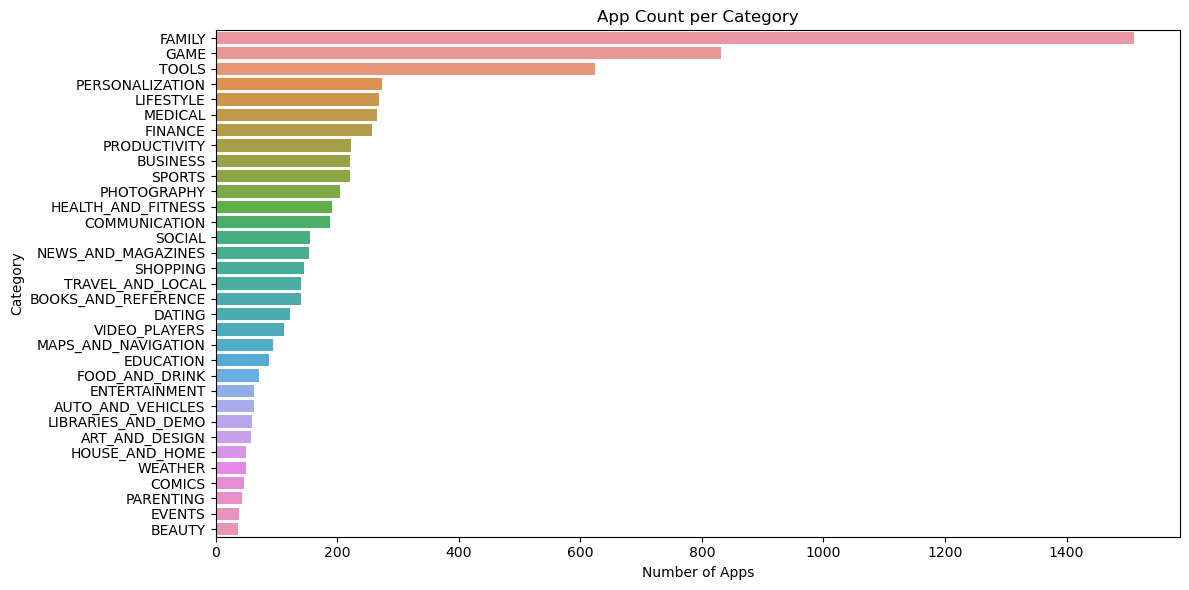

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of apps per category
plt.figure(figsize=(12,6))
sns.countplot(data=apps_df, y='Category', order=apps_df['Category'].value_counts().index)
plt.title('App Count per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


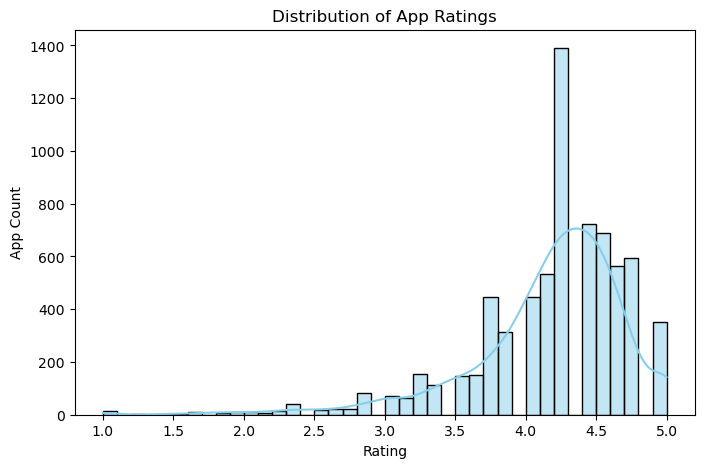

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(apps_df['Rating'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('App Count')
plt.show()


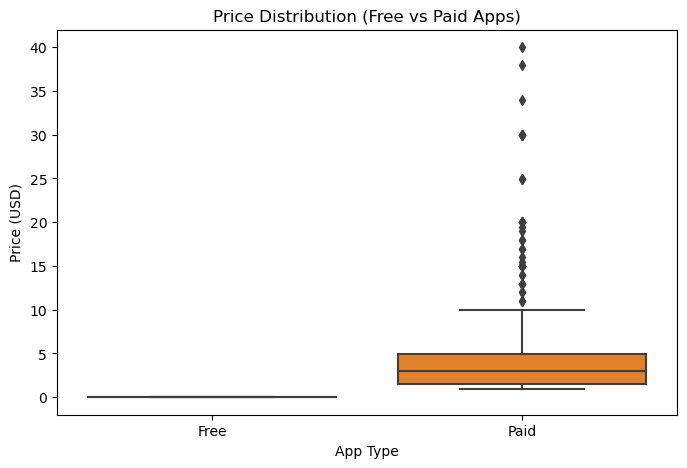

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Price', data=apps_df[apps_df['Price'] < 50])  # Exclude extreme outliers
plt.title('Price Distribution (Free vs Paid Apps)')
plt.xlabel('App Type')
plt.ylabel('Price (USD)')
plt.show()


In [8]:
# First, convert everything to string just in case
apps_df['Installs'] = apps_df['Installs'].astype(str)

# Remove unwanted characters and convert to int
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True)

# Now convert to numeric, coercing any errors
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Drop rows where conversion failed (if any)
apps_df = apps_df.dropna(subset=['Installs'])

# Convert back to int if needed
apps_df['Installs'] = apps_df['Installs'].astype(int)


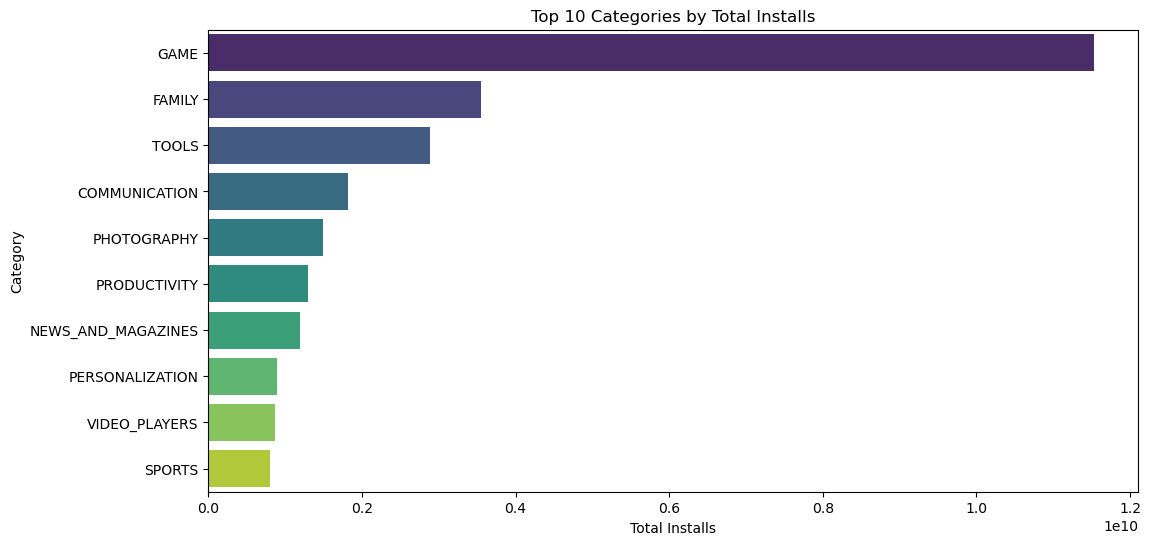

In [9]:
plt.figure(figsize=(12, 6))
top_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_installs.values, y=top_installs.index, palette='viridis')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()


In [10]:
reviews_df = pd.read_csv("USER_REVIEWS.csv")  # Replace with your actual filename if different
reviews_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [11]:
reviews_df.isnull().sum()


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [12]:
reviews_df = reviews_df.dropna(subset=["Sentiment", "Sentiment_Polarity"])


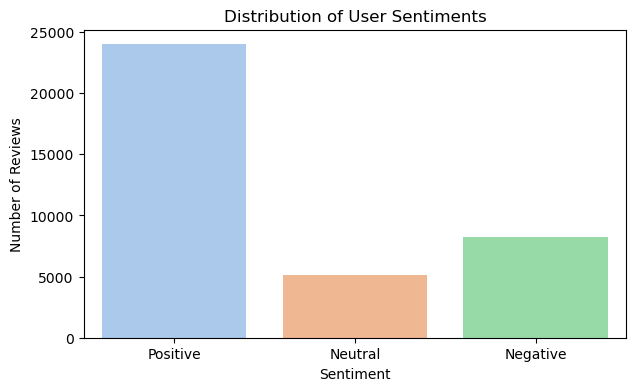

In [13]:
plt.figure(figsize=(7, 4))
sns.countplot(data=reviews_df, x='Sentiment', palette='pastel')
plt.title('Distribution of User Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [21]:
import plotly.express as px

category_ratings = apps_df.groupby("Category")["Rating"].mean().reset_index()
category_ratings = category_ratings.sort_values(by="Rating", ascending=False)

fig = px.bar(category_ratings, 
             x="Rating", 
             y="Category", 
             orientation='h', 
             title="Average App Rating by Category",
             color="Rating",
             color_continuous_scale="blues")

fig.show()
